<a href="https://colab.research.google.com/github/BonyGeorge/Wheat-Impurities-Detection/blob/master/SRS%20Models/Wild_Oat_%26_Wheat_Detection_YOLOv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 3489 (delta 45), reused 42 (delta 19), pack-reused 3407
Receiving objects: 100% (3489/3489), 6.59 MiB | 4.71 MiB/s, done.
Resolving deltas: 100% (2319/2319), done.


In [4]:
!unzip /content/gdrive/MyDrive/dataset/wheat_data.zip -d yolov5

Streaming output truncated to the last 5000 lines.
  inflating: yolov5/wheat_data/images/train/f8f466cc9.jpg  
  inflating: yolov5/wheat_data/images/train/eaeda7363.jpg  
  inflating: yolov5/wheat_data/images/train/1364f7561.jpg  
  inflating: yolov5/wheat_data/images/train/a5df11e9f.jpg  
  inflating: yolov5/wheat_data/images/train/22eabfde5.jpg  
  inflating: yolov5/wheat_data/images/train/36fb90706.jpg  
  inflating: yolov5/wheat_data/images/train/fc8cf268b.jpg  
  inflating: yolov5/wheat_data/images/train/eac655fcc.jpg  
  inflating: yolov5/wheat_data/images/train/70dd6f08f.jpg  
  inflating: yolov5/wheat_data/images/train/9d78cb5d0.jpg  
  inflating: yolov5/wheat_data/images/train/ce9534fc2.jpg  
  inflating: yolov5/wheat_data/images/train/8115795f7.jpg  
  inflating: yolov5/wheat_data/images/train/1e58125ec.jpg  
  inflating: yolov5/wheat_data/images/train/f52f20733.jpg  
  inflating: yolov5/wheat_data/images/train/a555ed46d.jpg  
  inflating: yolov5/wheat_data/images/train/eb983

In [5]:
cd yolov5

/content/yolov5


In [31]:
!pip install -U PyYAML
!pip install wandb

Requirement already up-to-date: PyYAML in /usr/local/lib/python3.6/dist-packages (5.3.1)
     |████████████████████████████████| 1.8MB 5.5MB/s 
     |████████████████████████████████| 133kB 19.4MB/s 
     |████████████████████████████████| 81kB 7.8MB/s 
     |████████████████████████████████| 163kB 11.2MB/s 
     |████████████████████████████████| 102kB 8.6MB/s 
     |████████████████████████████████| 71kB 7.6MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp36-none-any.whl size=6490 sha256=d3218379b7332f31ffdc2297c8ba22e065804b3fa086d9ce4d7dc809d59ee353
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
Successfully built subprocess32


In [8]:
!python train.py --img 1024 --batch 8 --epochs 10 --data wheat.yaml --cfg models/yolov5s.yaml --name WheatModel

Using torch 1.7.0+cu101 CUDA:0 (Tesla P100-PCIE-16GB, 16280MB)

Namespace(adam=False, batch_size=8, bucket='', cache_images=False, cfg='models/yolov5s.yaml', data='wheat.yaml', device='', epochs=10, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[1024, 1024], local_rank=-1, log_artifacts=False, log_imgs=16, multi_scale=False, name='WheatModel', noautoanchor=False, nosave=False, notest=False, project='runs/train', rect=False, resume=False, save_dir='runs/train/WheatModel', single_cls=False, sync_bn=False, total_batch_size=8, weights='yolov5s.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
2020-12-23 15:00:52.880644: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
Hyperparameters {'lr0': 0.01, 'lrf': 0.2, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8,

In [23]:
 !python detect.py --source /content/yolov5/input/test/ --weights best.pt

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='/content/yolov5/input/test/', update=False, view_img=False, weights=['best.pt'])
Using torch 1.7.0+cu101 CUDA:0 (Tesla P100-PCIE-16GB, 16280MB)

Fusing layers... 
Model Summary: 232 layers, 7246518 parameters, 0 gradients
image 1/2 /content/yolov5/input/test/download.jpeg: 448x640 2 Healthy Wheat Corps, Done. (0.015s)
image 2/2 /content/yolov5/input/test/download2.jpeg: 640x640 29 Healthy Wheat Corps, Done. (0.014s)
Results saved to runs/detect/exp
Done. (0.070s)


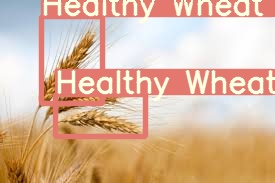

In [30]:
from IPython.display import Image
Image(filename='runs/detect/exp/download.jpeg', width=600, height=500)

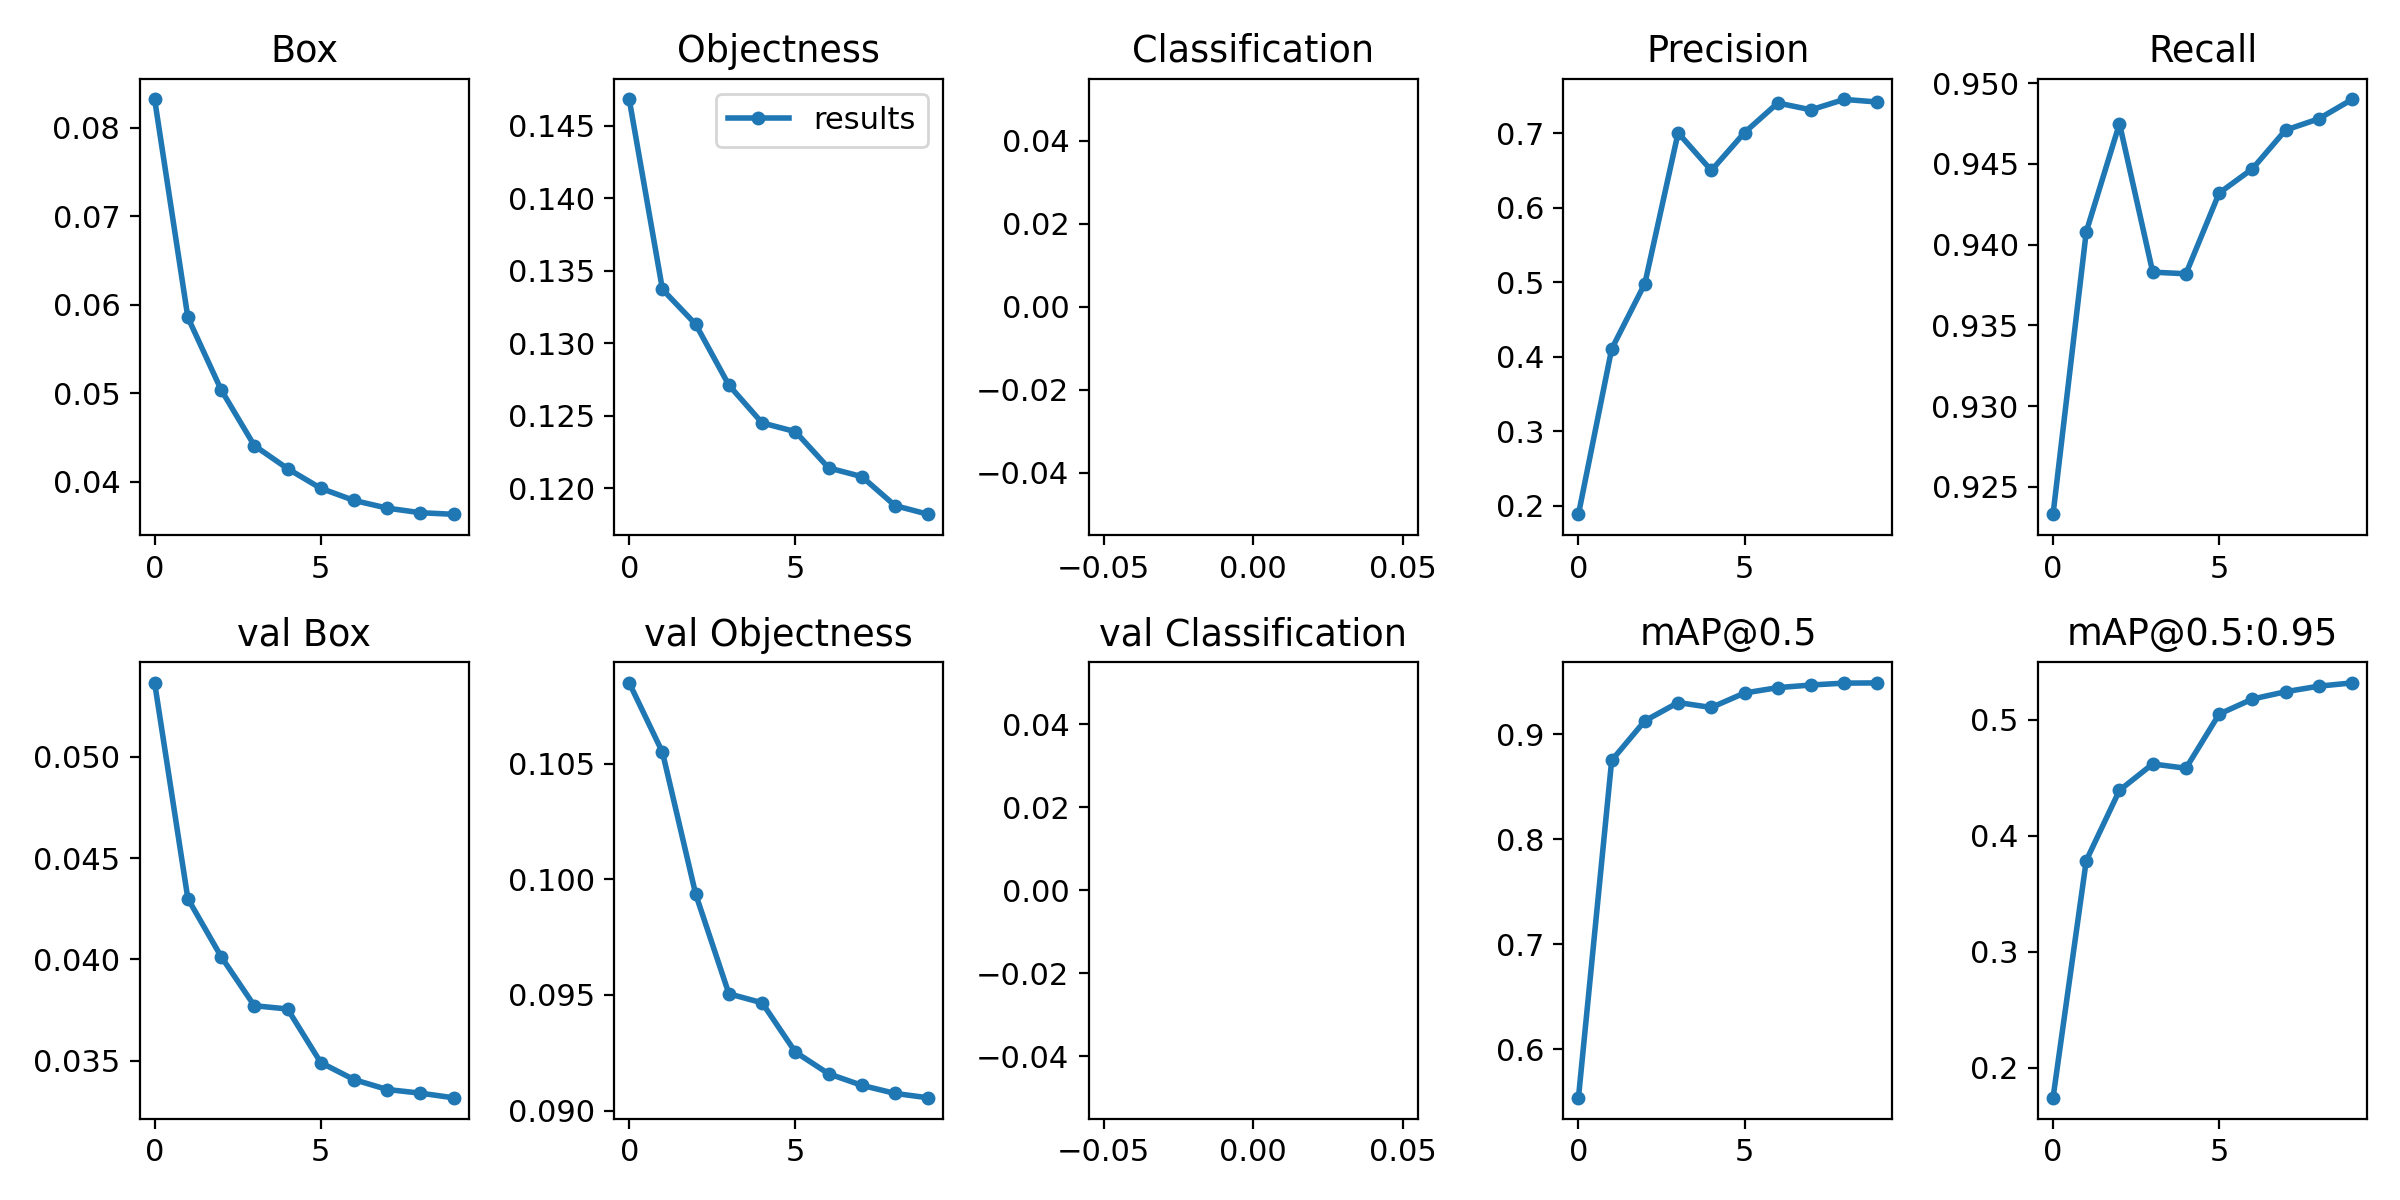

In [35]:
from utils.plots import plot_results 
plot_results(save_dir='runs/train/WheatModel/')
Image(filename='runs/train/WheatModel/results.png', width=800)



<center><h2>End of Document.</h2></center>

